# Goodreads recommender system

Creating a book recommender system in Python.

Skills tested:

Using Pandas to access and explore the dataset.
Using Pandas and Python in creating a simple popularity-based book recommender system.
Using the Scikit-Learn implementation of TF-IDF Vectorizer in creating a content-based filtering recommender system for book recommendations.
Using the Scikit-Learn distance matrices in calculating preferences in the recommender system.

A dataset of books from Goodreads known for use in recommendation engines.

**Columns Description:**

- bookID contains the unique ID for each book/series
- title contains the titles of the books
- authors contains the author of the particular book
- average_rating the average rating of the books, as decided by the users
- ISBNISBN (10) number, tells the information about a book - such as edition and publisher
- ISBN 13 the new format for ISBN, implemented in 2007. (13 digits)
- language_code denotes the language for the books
- Num_pages contains the number of pages for the book
- Ratings_count contains the number of ratings given for the book
- text_reviews_count the count of reviews left by users

Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a GIT push operation.
You are expected to write around 35 lines of code to complete this project.

## Download the dataset

Download the Dataset
Method 1
Download the dataset from the following link:
https://www.kaggle.com/jealousleopard/goodreadsbooks/download

In [5]:
import os
os.chdir("C://Users//cbeer//Desktop//data-science-learning//python-for-machine-learning")

import warnings 
warnings.filterwarnings('ignore')



## Read the Dataset
Read the dataset into a Pandas Dataframe!

In [19]:
import pandas as pd
dat_raw = pd.read_csv("dat//books.csv", error_bad_lines=False)

dat_raw

# there are errors in the file - skip the lines with errors

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


Let's inspect the data first and do a bit of cleaning

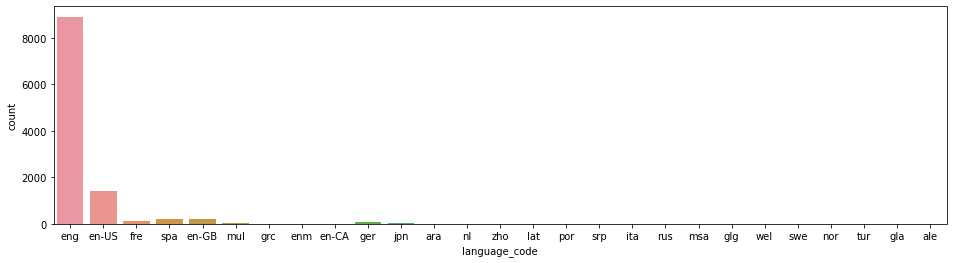

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,4))
ax = sns.countplot(x=dat_raw.language_code, data=dat_raw) #interesting - there are three different english language tags

In [23]:
dat = dat_raw.loc[dat_raw['language_code'].isin(['eng', 'en-US', 'en-GB', 'en-CA'])].reset_index() # gets rid of books that haven't been reviewed much and books in non-english languages

Let's plot number of votes by rating score to see where the number of votes starts to introduce a lot of variance in ratings. 

- It looks like things start to look normal-ish after about 15 ratings. Below that you get a lot of 5 and 1 average ratings

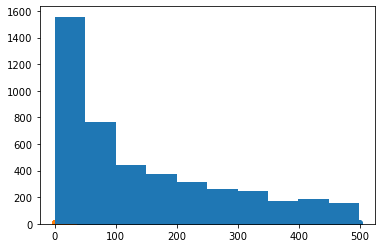

In [44]:
plt.hist('ratings_count', data = dat[dat['ratings_count'] < 500])

plt.scatter('ratings_count', 'average_rating', data = dat[dat['ratings_count'] < 500])

plt.scatter('ratings_count', 'average_rating', data = dat[dat['ratings_count'] < 30])


## Popularity-based Recommender
Create a function named Popularity Recommender and use it to recommend books based on popularity.
Use a weighted rank similar to that used in the IMDB rating example in Lesson 2.

In [66]:
def pop_rec(dat, n):

    m = 15, 

    C = dat['average_rating'].mean()

    dat['wr'] = ((dat['ratings_count'] / (dat['ratings_count'] + m))*dat['average_rating']) + ((m / (dat['ratings_count'] + m))*C)

    recs = dat.sort_values('wr', ascending=False).head(n).loc[:, ['title', 'average_rating']]

    print('The ' + str(n) + ' most popular books in the data are: ')

    print(recs.to_string(index = False))



Who comes out on top in this ratings system?

In [67]:
pop_rec(dat, 10)

The 10 most popular books in the data are: 
                                                             title  average_rating
                                    The Complete Calvin and Hobbes            4.82
            Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)            4.78
                     It's a Magical World (Calvin and Hobbes  #11)            4.76
                      Harry Potter Collection (Harry Potter  #1-6)            4.73
                Homicidal Psycho Jungle Cat (Calvin and Hobbes #9)            4.72
Calvin and Hobbes: Sunday Pages 1985-1995: An Exhibition Catalogue            4.71
                                                  Study Bible: NIV            4.70
                    The Complete Aubrey/Maturin Novels (5 Volumes)            4.70
                                          The Days Are Just Packed            4.69
          The Sibley Field Guide to Birds of Western North America            4.69


## Content-based Recommender
Create a function named Content-based Recommender and use it to recommend books based on content.

In [69]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

### TF-IDF Vectorizer
Use TF-IDF Vectorizer on the author data for each book.

The TD-IDF Vectorizer takes as its input a series of strings, and returns a collection of distance vectors

In [73]:
# assign stop words - words not to include in vectorization. This is the dictionary of english stop words, like "the".

cbr = TfidfVectorizer(stop_words='english')

# Train vectorizer on title

tfidf_matrix = cbr.fit_transform(dat['title'])

# turn titles into distance vector

distance_matrix = linear_kernel(tfidf_matrix)

# we need to make a new index so we can reference it in our function. We move the titles into the index and drop duplicate titles

ind = pd.Series(dat.index, index=dat['title']).drop_duplicates()


In [91]:
# Take the re-indexed dataset, find the most similar titles to a given title, and return the nearest matches

def con_rec_title(dat, title, ind, distance_matrix, n):
    id = ind[title] # pull the index for our chosen book
    distances = list(enumerate(distance_matrix[id])) # pull all distance meaures for our chosen book
    distances = sorted(distances, key = lambda x: x[1], reverse=True) # sort distances according to similarity to our title
    distances = distances[1:n+1] # we don't want to return the first element because it will be itself
    rec_rows = [distance[0] for distance in distances] # for each distance in distances, return the row number for the recommendation
    recs = dat['title'].iloc[rec_rows]
    print('The ' + str(n) + ' most similar titles in the data are: ')
    print(recs.to_string(index = False))
    

In [92]:
con_rec_title(dat, "For Whom the Bell Tolls", ind, distance_matrix, 10)

The 10 most similar titles in the data are: 
                           For Whom the Bell Tolls
                                    Iceland's Bell
             The Liberty Bell (Symbols of America)
Desert Queen: The Extraordinary Life of Gertrud...
Harry Potter and the Half-Blood Prince (Harry P...
Harry Potter and the Order of the Phoenix (Harr...
Harry Potter and the Chamber of Secrets (Harry ...
Harry Potter and the Prisoner of Azkaban (Harry...
Harry Potter Boxed Set  Books 1-5 (Harry Potter...
Unauthorized Harry Potter Book Seven News: "Hal...


### Distance matrix
Choose cosine similarity for pairwise distances comparison

In [97]:
from sklearn.metrics.pairwise import cosine_similarity

# assign stop words again

cbr = TfidfVectorizer(stop_words='english')

tfidf_matrix = cbr.fit_transform(dat['authors'])

distance_matrix = cosine_similarity(tfidf_matrix) # this time we use cosine similarity, a meaure of the angle between the tfidf vectors, to measure distance

dat = dat.drop_duplicates(subset='authors' ) # re-create indices 
ind = pd.Series(dat.index, index = dat['authors']).drop_duplicates(keep = "first", inplace = False)




In [98]:
def con_rec_auth(dat, author, ind, distance_matrix, n):
    id = ind[author] # pull the index for our chosen book
    distances = list(enumerate(distance_matrix[id])) # pull all distance meaures for our chosen book
    distances = sorted(distances, key = lambda x: x[1], reverse=True) # sort distances according to similarity to our title
    distances = distances[1:n+1] # we don't want to return the first element because it will be itself
    rec_rows = [distance[0] for distance in distances] # for each distance in distances, return the row number for the recommendation
    recs = dat['authors'].iloc[rec_rows]
    print('The ' + str(n) + ' most similar authors in the data are: ')
    print(recs.to_string(index = False))

In [104]:
con_rec_auth(dat, "Don DeLillo", ind, distance_matrix, 5) # note that if I were designing this I would try to split the co-authored books

The 5 most similar authors in the data are: 
   Bernard Malamud/Robert Giroux
  Bernard Malamud/Jonathan Rosen
   Diane Waldman/Bernard Malamud
   Bernard Malamud/Jhumpa Lahiri
Bernard Malamud/Aleksandar Hemon
